#Data Science Regression Project: Predicting Flight Prices

[Dataset](https://www.kaggle.com/datasets/muhammadbinimran/flight-price-prediction)

##Problem Statement :
The objective is to analyze the flight booking dataset obtained from a platform which is used to book flight tickets. A thorough study of the data will aid in the discovery of valuable insights that will be of enormous value to passengers. Apply EDA, statistical methods and Machine learning algorithms in order to get meaningful information from it.

##Dataset Information:
Flight Price Prediction Dataset" is a comprehensive collection of data aimed at predicting the prices of airline tickets. This dataset provides a rich source of information for machine learning and data analysis enthusiasts interested in the aviation and travel industry. It includes a wide range of features and variables, such as flight routes, departure and arrival cities, airline carriers, departure and arrival times, ticket class, and more. Helping travelers make informed decisions and airlines optimize their pricing strategies. It's a valuable resource for anyone looking to delve into the world of airfare prediction and travel analytics.


**Train Dataset contains 11 attributes:**
1. Airline
2. Date_of_Journey
3. Source
4. Destination
5. Route
6. Dep_Time
7. Arrival_Time
8. Duration
9. Total_Stops
10. Additional_Info
11. Price



**Test Dataset contains 10 attributes so according to that and Train Dataset predictions we have to predict the Price of Test Dataset.**

##Importing the Libraries

In [404]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

##Loading the dataset

In [405]:
df_train = pd.read_excel("/content/Data_Train.xlsx")
df_test = pd.read_excel("/content/Test_set.xlsx")
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [406]:
df_train.shape

(10683, 11)

##Data Cleaning

In [407]:
df_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [408]:
#only two null values so have to remove it.
df_train = df_train.dropna()

In [409]:
df_train.duplicated().sum()

220

In [410]:
#Remove duplicate values
df_train = df_train.drop_duplicates()

In [411]:
df_train.shape

(10462, 11)

In [412]:
df_train['Airline'].value_counts()

Jet Airways                          3700
IndiGo                               2043
Air India                            1694
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [413]:
df_train['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [414]:
df_train['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [415]:
#Contain two values of Delhi so replace New Delhi to Delhi.
df_train['Destination'] = df_train['Destination'].replace({'New Delhi':'Delhi'})

In [416]:
df_train['Destination'].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [417]:
df_train['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [418]:
#convert two values into one
df_train['Additional_Info'] = df_train['Additional_Info'].replace({'No info':'No Info'})

In [419]:
df_train['Additional_Info'].value_counts()

No Info                         8185
In-flight meal not included     1926
No check-in baggage included     318
1 Long layover                    19
Change airports                    7
Business class                     4
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [420]:
# Function to convert duration to numeric value
def convert_duration(duration):
    total_minutes = 0
    parts = duration.split()
    for part in parts:
        if 'h' in part:
            total_minutes += int(part[:-1]) * 60  # Extract the numeric part before 'h' and convert to minutes
        elif 'm' in part:
            total_minutes += int(part[:-1])  # Extract the numeric part before 'm'
    return total_minutes

# Convert 'Duration' column to a new column 'Duration_in_minutes'
df_train['Duration_in_minutes'] = df_train['Duration'].apply(convert_duration)

Convert Duration column into integer values in minutes.

In [421]:
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Duration_in_minutes
0,IndiGo,24/03/2019,Banglore,Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No Info,3897,170
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No Info,7662,445
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No Info,13882,1140
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No Info,6218,325
4,IndiGo,01/03/2019,Banglore,Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No Info,13302,285


In [422]:
df_train['Arrival_Time'].unique()

array(['01:10 22 Mar', '13:15', '04:25 10 Jun', ..., '06:50 10 Mar',
       '00:05 19 Mar', '21:20 13 Mar'], dtype=object)

Arrival Time contain outliers so have to convert it into proper time frame.

In [423]:
# Function to extract only the time part from Arrival_Time
def extract_time(arrival_time):
    return arrival_time.split()[0]

# Apply the function to the 'Arrival_Time' column
df_train['Arrival_Time'] = df_train['Arrival_Time'].apply(extract_time)

In [424]:
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Duration_in_minutes
0,IndiGo,24/03/2019,Banglore,Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No Info,3897,170
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No Info,7662,445
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No Info,13882,1140
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No Info,6218,325
4,IndiGo,01/03/2019,Banglore,Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No Info,13302,285


In [425]:
# Function to categorize time into Morning, Afternoon, Evening, Night, and Late Night
def categorize_time(time_str):
    hour = int(time_str.split(':')[0])
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    elif 21 <= hour <= 23:
        return 'Night'
    else:
        return 'Late Night'

# Apply the function to create new columns
df_train['Dep_Time'] = df_train['Dep_Time'].apply(categorize_time)
df_train['Arrival_Time'] = df_train['Arrival_Time'].apply(categorize_time)


Convert timezone into Morning, Afternoon, Evening, Night, and Late Night.

In [426]:
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Duration_in_minutes
0,IndiGo,24/03/2019,Banglore,Delhi,BLR → DEL,Night,Late Night,2h 50m,non-stop,No Info,3897,170
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,Morning,Afternoon,7h 25m,2 stops,No Info,7662,445
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,Morning,Late Night,19h,2 stops,No Info,13882,1140
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,Evening,Night,5h 25m,1 stop,No Info,6218,325
4,IndiGo,01/03/2019,Banglore,Delhi,BLR → NAG → DEL,Afternoon,Night,4h 45m,1 stop,No Info,13302,285


In [427]:
df_train['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [428]:
# Mapping dictionary for Total_Stops
stops_mapping = {'non-stop': 0, '1 stop': 1, '2 stops': 2, '3 stops': 3, '4 stops': 4}
# Replace values in the 'Total_Stops' column
df_train['Total_Stops'] = df_train['Total_Stops'].replace(stops_mapping)

Convert Total_stops into integer

In [429]:
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Duration_in_minutes
0,IndiGo,24/03/2019,Banglore,Delhi,BLR → DEL,Night,Late Night,2h 50m,0,No Info,3897,170
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,Morning,Afternoon,7h 25m,2,No Info,7662,445
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,Morning,Late Night,19h,2,No Info,13882,1140
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,Evening,Night,5h 25m,1,No Info,6218,325
4,IndiGo,01/03/2019,Banglore,Delhi,BLR → NAG → DEL,Afternoon,Night,4h 45m,1,No Info,13302,285


In [430]:
df_train.describe()

,Total_Stops,Price,Duration_in_minutes
count,10462.000000,10462.000000,10462.000000
mean,0.802332,9026.790289,629.781591
std,0.660609,4624.849541,500.699045
min,0.000000,1759.000000,5.000000
25%,0.000000,5224.000000,170.000000
50%,1.000000,8266.000000,505.000000
75%,1.000000,12344.750000,910.000000
max,4.000000,79512.000000,2860.000000


##Outliers detection and Removing

<Axes: xlabel='Source', ylabel='Price'>

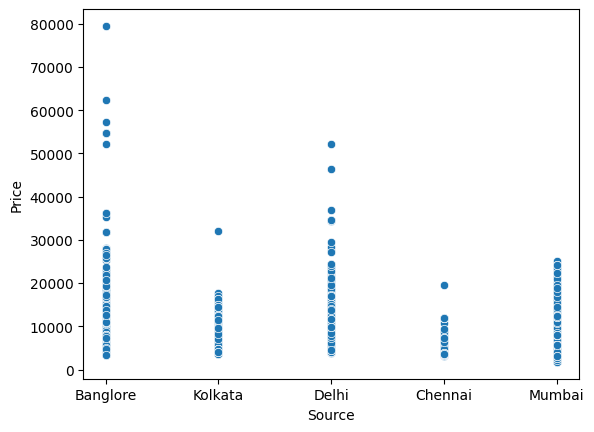

In [431]:
sns.scatterplot(x=df_train['Source'],y=df_train['Price'])

<Axes: xlabel='Destination', ylabel='Price'>

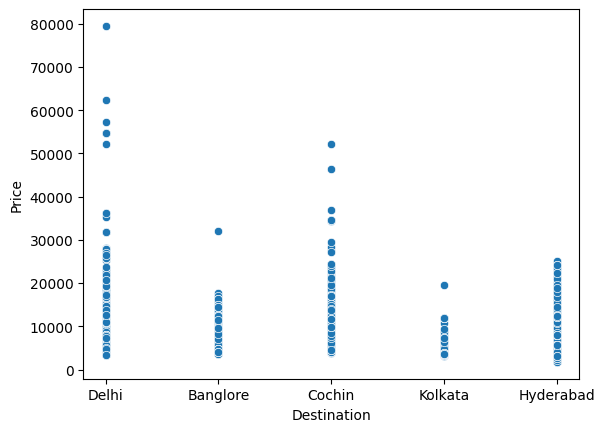

In [432]:
sns.scatterplot(x=df_train['Destination'],y=df_train['Price'])

In [433]:
# Filter rows where Price is more than 30000
high_price = df_train[df_train['Price'] > 30000]
high_price

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Duration_in_minutes
396,Multiple carriers,1/03/2019,Delhi,Cochin,DEL → BOM → COK,Afternoon,Evening,6h 25m,1,No Info,36983,385
657,Jet Airways Business,01/03/2019,Banglore,Delhi,BLR → BOM → DEL,Morning,Morning,5h,1,No Info,52229,300
1478,Jet Airways,18/03/2019,Banglore,Delhi,BLR → BOM → DEL,Evening,Late Night,6h 5m,1,No Info,54826,365
1629,Air India,01/03/2019,Banglore,Delhi,BLR → BOM → NAG → DEL,Morning,Morning,25h 45m,2,No Info,31783,1545
2099,Jet Airways,01/03/2019,Banglore,Delhi,BLR → BOM → DEL,Afternoon,Evening,5h 5m,1,No Info,36235,305
2618,Jet Airways,18/03/2019,Banglore,Delhi,BLR → BOM → DEL,Night,Morning,6h 15m,1,No Info,54826,375
2693,Jet Airways,01/03/2019,Banglore,Delhi,BLR → BOM → DEL,Evening,Late Night,6h 5m,1,No Info,35185,365
2924,Jet Airways Business,01/03/2019,Banglore,Delhi,BLR → BOM → DEL,Morning,Morning,5h 40m,1,Business class,79512,340
3700,Jet Airways,01/03/2019,Banglore,Delhi,BLR → BOM → DEL,Night,Morning,10h 40m,1,1 Long layover,31825,640
5013,Jet Airways,01/03/2019,Banglore,Delhi,BLR → BOM → DEL,Night,Morning,11h 35m,1,1 Long layover,31825,695


In [434]:
high_price.shape

(24, 12)

This all are outlier because there is a lot of charges of price and duration time is also too much so have to remove those values.

In [435]:
high_price = df_train[df_train['Price'] > 30000].index
df_train = df_train.drop(high_price)

In [436]:
df_train.describe()

,Total_Stops,Price,Duration_in_minutes
count,10438.000000,10438.000000,10438.000000
mean,0.801495,8950.081433,629.949224
std,0.660750,4300.971692,501.067073
min,0.000000,1759.000000,5.000000
25%,0.000000,5224.000000,170.000000
50%,1.000000,8262.000000,505.000000
75%,1.000000,12287.000000,910.000000
max,4.000000,29528.000000,2860.000000


<Axes: >

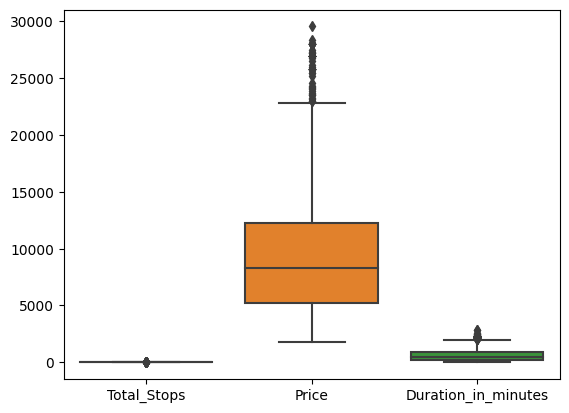

In [437]:
# Create a box plot for each numeric column
sns.boxplot(data=df_train)

##IQR

In [438]:
##outlier removal for Price

Q1 = df_train.Price.quantile(0.25)
Q3 = df_train.Price.quantile(0.75)
Q1, Q3

(5224.0, 12287.0)

In [439]:
IQR = Q3 - Q1
IQR

7063.0

In [440]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(-5370.5, 22881.5)

In [441]:
df_train[(df_train.Price<lower_limit)|(df_train.Price>upper_limit)]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Duration_in_minutes
123,Air India,1/03/2019,Delhi,Cochin,DEL → BOM → COK,Night,Evening,20h 15m,1,No Info,27430,1215
486,Jet Airways,01/03/2019,Banglore,Delhi,BLR → BOM → DEL,Morning,Afternoon,6h 20m,1,No Info,26890,380
510,Jet Airways,01/03/2019,Banglore,Delhi,BLR → BOM → DEL,Morning,Afternoon,5h 25m,1,No Info,26890,325
597,Air India,6/03/2019,Mumbai,Hyderabad,BOM → JDH → DEL → HYD,Morning,Afternoon,29h 35m,2,No Info,25139,1775
628,Jet Airways,15/03/2019,Banglore,Delhi,BLR → BOM → DEL,Night,Morning,6h 10m,1,No Info,27210,370
...,...,...,...,...,...,...,...,...,...,...,...,...
10182,Air India,01/03/2019,Banglore,Delhi,BLR → BOM → DEL,Morning,Afternoon,5h 30m,1,No Info,23677,330
10189,Jet Airways,01/03/2019,Banglore,Delhi,BLR → BOM → DEL,Morning,Evening,13h 20m,1,No Info,27992,800
10353,Jet Airways,6/03/2019,Mumbai,Hyderabad,BOM → BDQ → DEL → HYD,Evening,Afternoon,21h,2,No Info,24210,1260
10383,Jet Airways,01/03/2019,Banglore,Delhi,BLR → BOM → DEL,Morning,Morning,22h 5m,1,No Info,26890,1325


In [442]:
# Create a boolean mask for rows to be removed
outliers_mask = (df_train['Price'] < lower_limit) | (df_train['Price'] > upper_limit)

In [443]:
# Remove rows with 'Price' outside the specified range
df_train = df_train[~outliers_mask]

In [444]:
df_train.shape

(10366, 12)

In [445]:
##Outliers removal of duration time
Q1 = df_train.Duration_in_minutes.quantile(0.25)
Q3 = df_train.Duration_in_minutes.quantile(0.75)
Q1, Q3

(170.0, 910.0)

In [446]:
IQR = Q3 - Q1
IQR

740.0

In [447]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(-940.0, 2020.0)

In [448]:
df_train[(df_train.Duration_in_minutes<lower_limit)|(df_train.Duration_in_minutes>upper_limit)]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Duration_in_minutes
226,Jet Airways,3/03/2019,Delhi,Cochin,DEL → IDR → BOM → COK,Morning,Evening,37h 25m,2,No Info,18799,2245
470,Jet Airways,21/03/2019,Delhi,Cochin,DEL → UDR → BOM → COK,Evening,Late Night,34h 5m,2,No Info,13082,2045
553,Air India,9/03/2019,Delhi,Cochin,DEL → AMD → BOM → COK,Morning,Evening,38h 15m,2,No Info,10598,2295
919,Air India,12/05/2019,Kolkata,Banglore,CCU → BBI → IXR → DEL → BLR,Afternoon,Night,35h 15m,3,No Info,10991,2115
925,Jet Airways,6/03/2019,Delhi,Cochin,DEL → DED → BOM → COK,Afternoon,Late Night,35h 35m,2,No Info,19907,2135
...,...,...,...,...,...,...,...,...,...,...,...,...
9703,Air India,3/03/2019,Delhi,Cochin,DEL → BHO → BOM → COK,Morning,Evening,37h 20m,2,No Info,13748,2240
10020,Air India,9/05/2019,Delhi,Cochin,DEL → AMD → BOM → COK,Morning,Evening,38h 15m,2,No Info,9653,2295
10326,Air India,03/03/2019,Banglore,Delhi,BLR → CCU → GAU → DEL,Morning,Night,40h 20m,2,No Info,11791,2420
10456,Jet Airways,6/03/2019,Delhi,Cochin,DEL → AMD → BOM → COK,Evening,Evening,47h 40m,2,No Info,20694,2860


In [449]:
outliers = (df_train['Duration_in_minutes'] < lower_limit) | (df_train['Duration_in_minutes'] > upper_limit)

In [450]:
# Remove rows with 'Price' outside the specified range
df_train = df_train[~outliers]

In [451]:
df_train.shape

(10292, 12)

<Axes: >

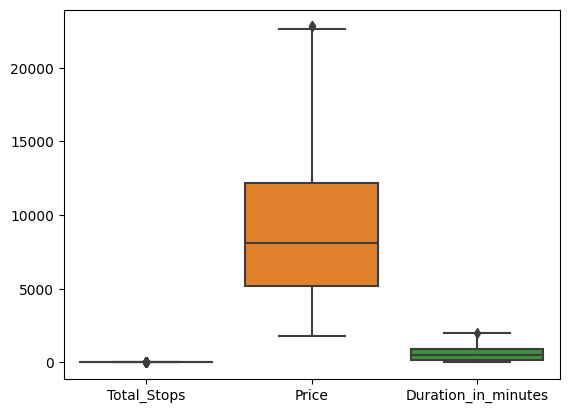

In [452]:
sns.boxplot(data=df_train)

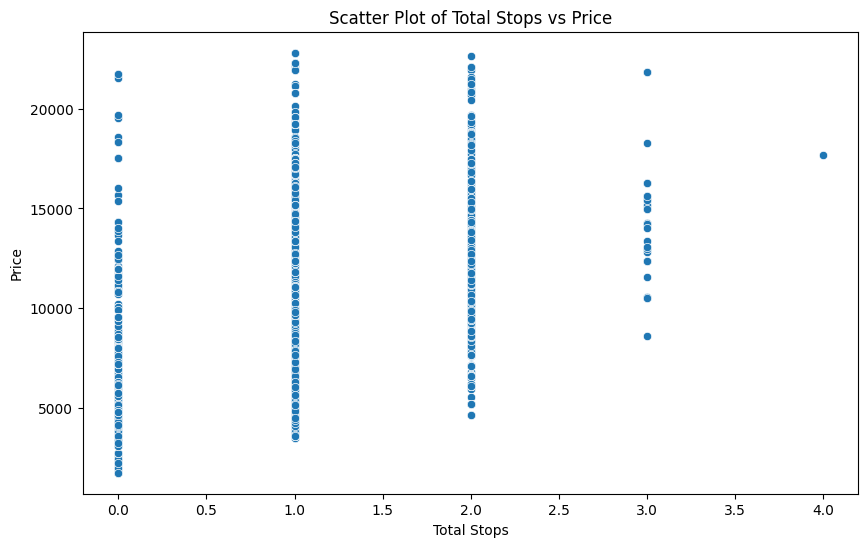

In [453]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total_Stops', y='Price', data=df_train)

# Set labels and title
plt.xlabel('Total Stops')
plt.ylabel('Price')
plt.title('Scatter Plot of Total Stops vs Price')

# Show the plot
plt.show()

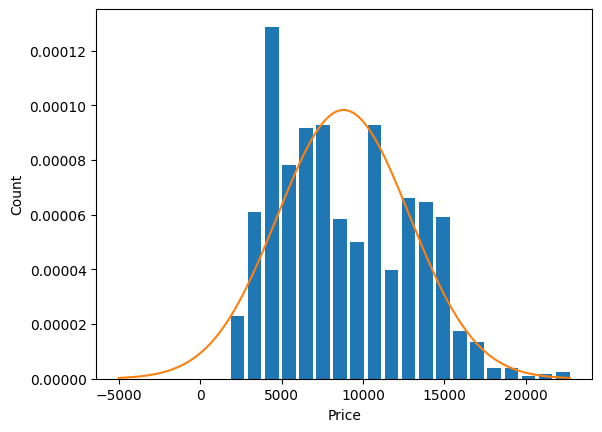

In [454]:
from scipy.stats import norm

plt.hist(df_train.Price, bins=20, rwidth=0.8, density=True)
plt.xlabel('Price')
plt.ylabel('Count')

rng = np.arange(-5000, df_train.Price.max(), 100)
plt.plot(rng, norm.pdf(rng,df_train.Price.mean(),df_train.Price.std()))

##Split the Date_of_Journey column

In [455]:
df_train['Date'] = pd.to_datetime(df_train['Date_of_Journey'])
df_train['Journey_Day'] = df_train['Date'].dt.day
df_train['Journey_Month'] = df_train['Date'].dt.month
df_train.drop('Date_of_Journey',axis=1,inplace=True)

In [456]:
df_train.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Duration_in_minutes,Date,Journey_Day,Journey_Month
0,IndiGo,Banglore,Delhi,BLR → DEL,Night,Late Night,2h 50m,0,No Info,3897,170,2019-03-24,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,Morning,Afternoon,7h 25m,2,No Info,7662,445,2019-01-05,5,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,Morning,Late Night,19h,2,No Info,13882,1140,2019-09-06,6,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,Evening,Night,5h 25m,1,No Info,6218,325,2019-12-05,5,12
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,Afternoon,Night,4h 45m,1,No Info,13302,285,2019-01-03,3,1


##EDA

In [457]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10292 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Airline              10292 non-null  object        
 1   Source               10292 non-null  object        
 2   Destination          10292 non-null  object        
 3   Route                10292 non-null  object        
 4   Dep_Time             10292 non-null  object        
 5   Arrival_Time         10292 non-null  object        
 6   Duration             10292 non-null  object        
 7   Total_Stops          10292 non-null  int64         
 8   Additional_Info      10292 non-null  object        
 9   Price                10292 non-null  int64         
 10  Duration_in_minutes  10292 non-null  int64         
 11  Date                 10292 non-null  datetime64[ns]
 12  Journey_Day          10292 non-null  int64         
 13  Journey_Month        10292 non-

In [458]:
#Unique values in each column
for i in df_train.columns:
    print(f'{i}: {df_train[i].nunique()}')

Airline: 11
Source: 5
Destination: 5
Route: 124
Dep_Time: 5
Arrival_Time: 5
Duration: 343
Total_Stops: 5
Additional_Info: 6
Price: 1803
Duration_in_minutes: 343
Date: 40
Journey_Day: 9
Journey_Month: 7


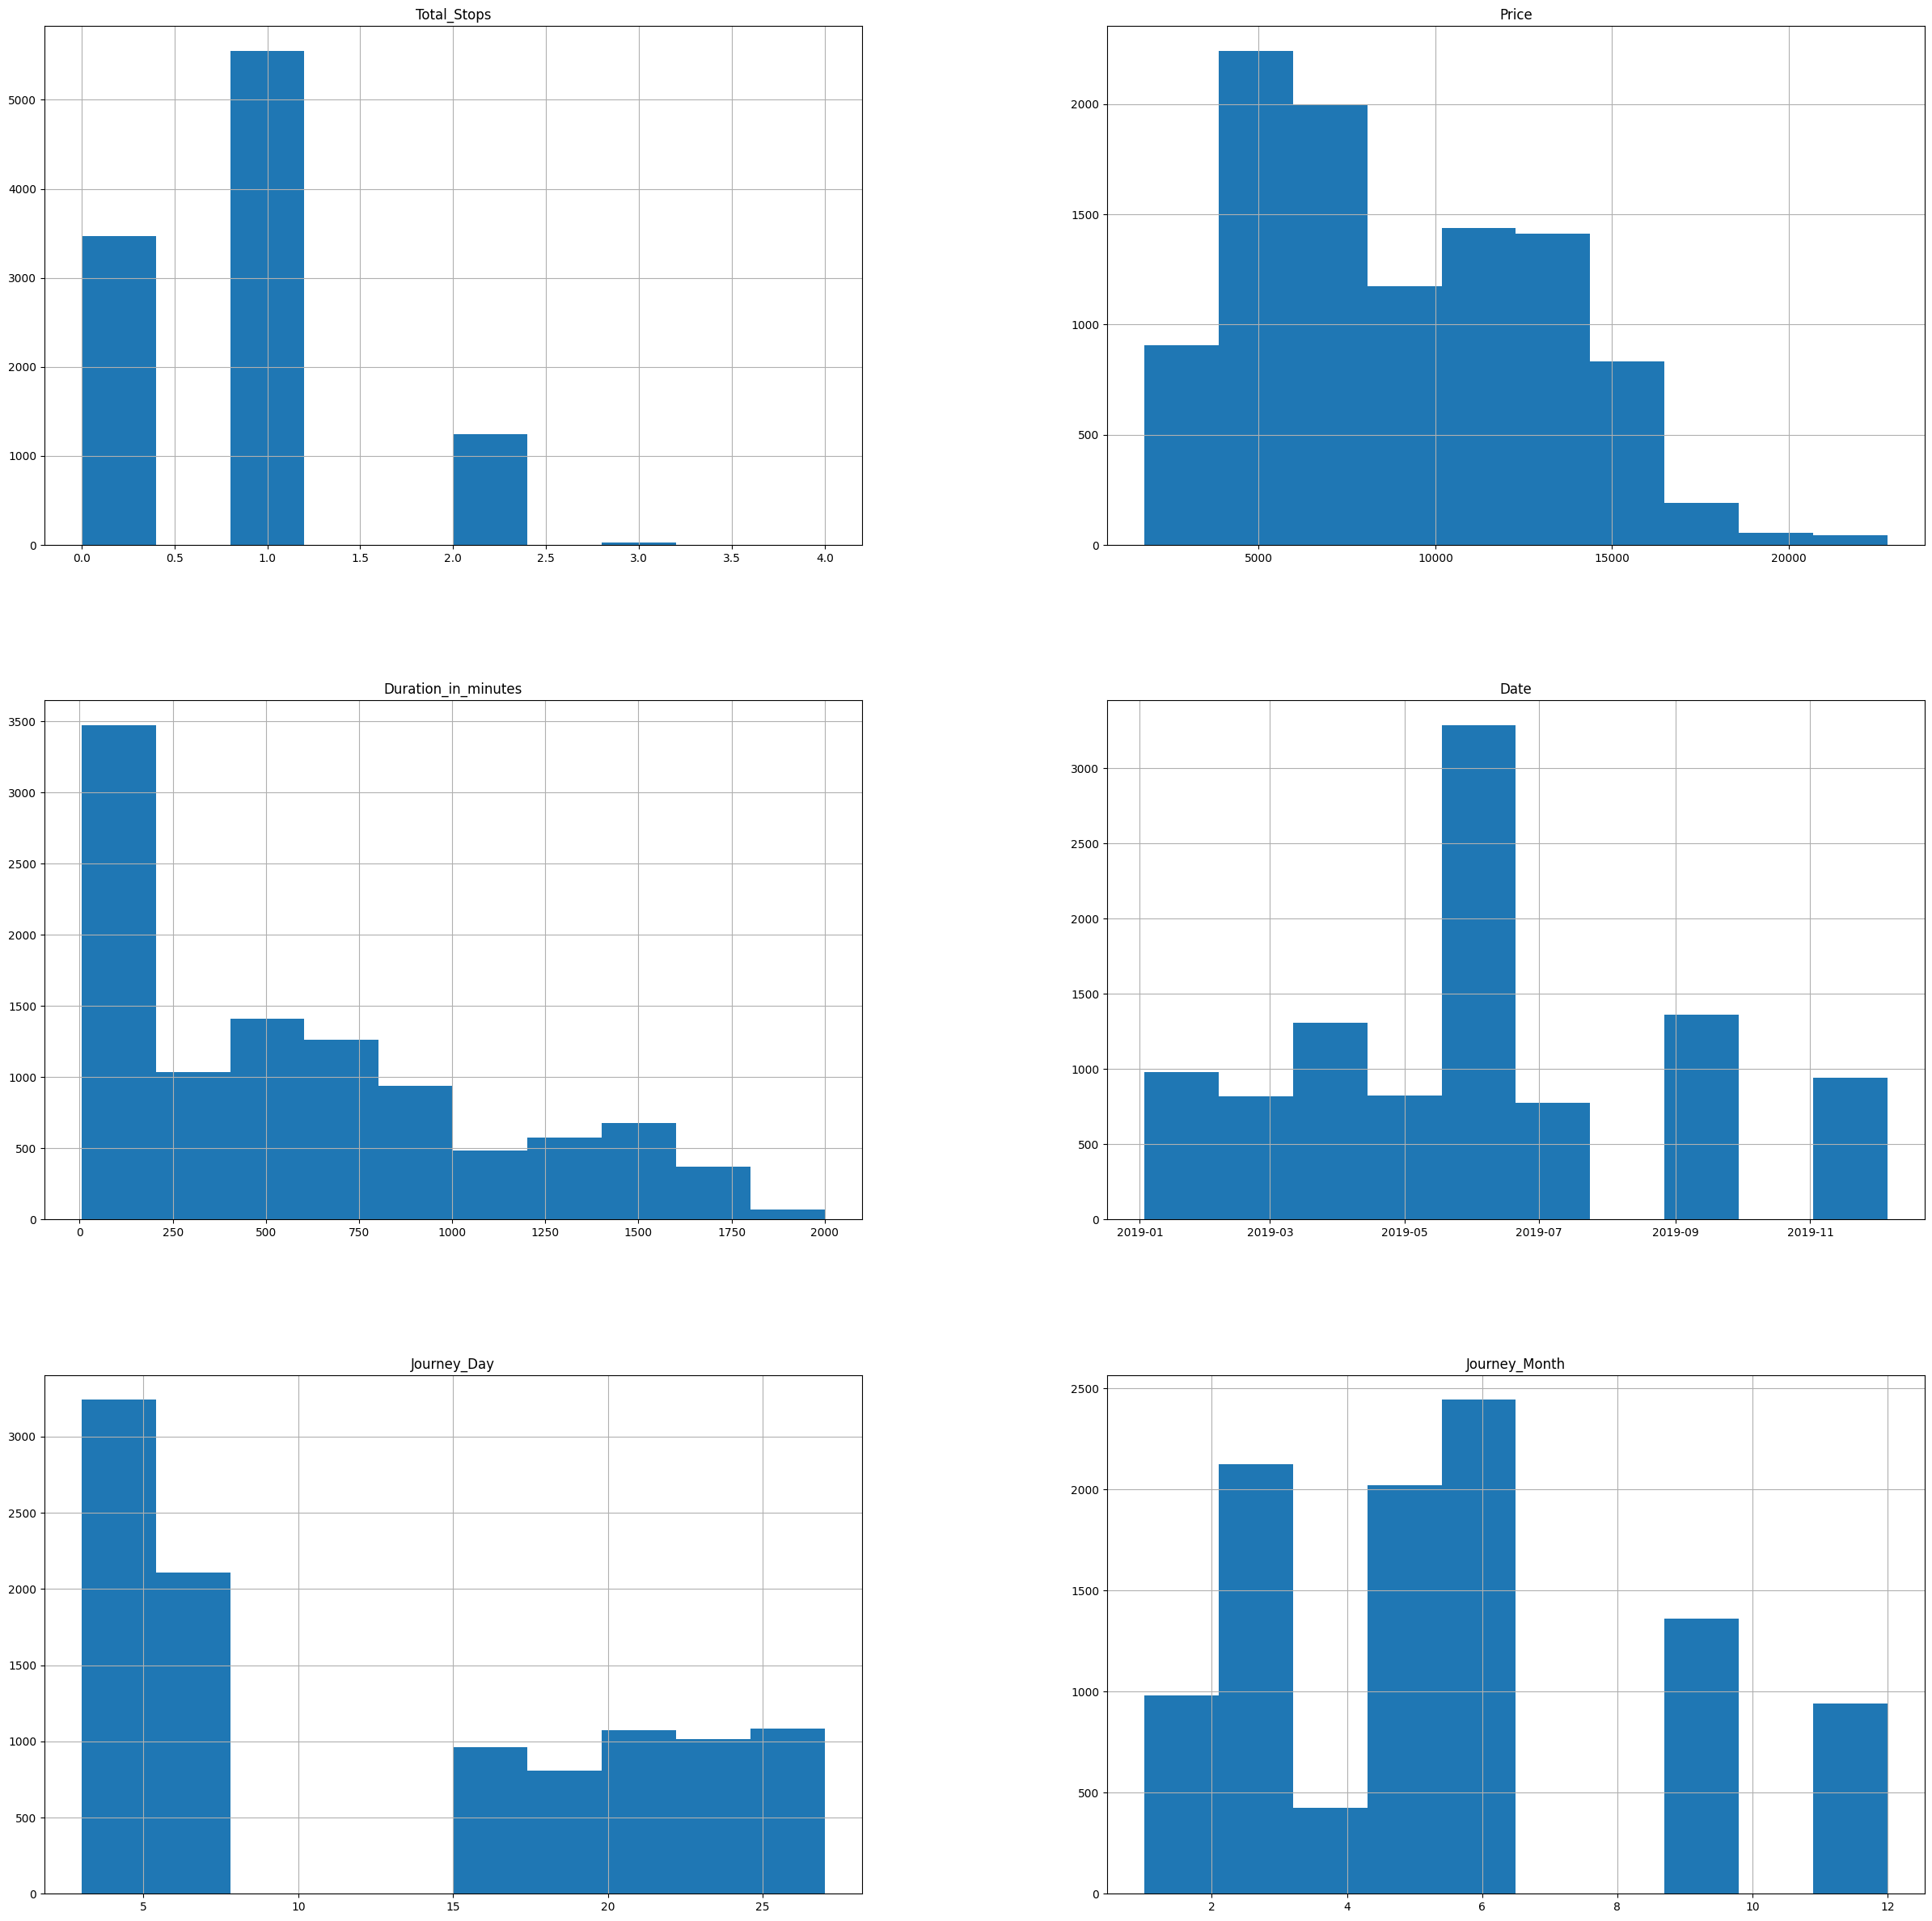

In [459]:
df_train.hist(figsize=(30,30))
plt.show()

<Axes: xlabel='Price', ylabel='Airline'>

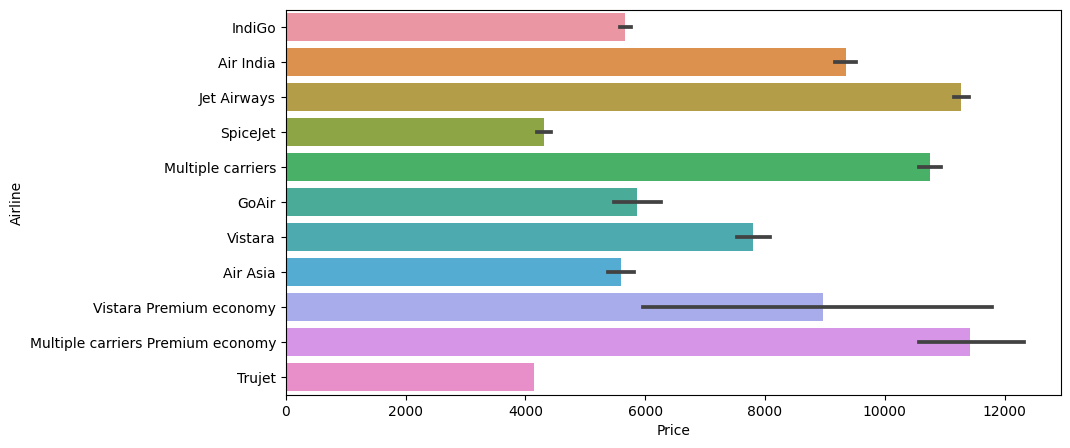

In [460]:
plt.figure(figsize=(10,5))
sns.barplot(x=df_train['Price'],y=df_train['Airline'])

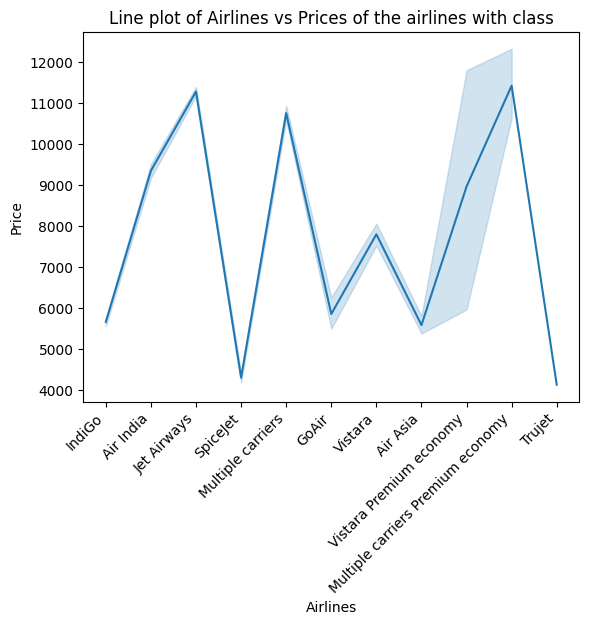

<Figure size 1500x1000 with 0 Axes>

In [461]:
x= df_train['Airline']
y=df_train['Price']
sns.lineplot(x=x,y=y)
plt.xlabel('Airlines')
plt.ylabel('Price')
plt.title('Line plot of Airlines vs Prices of the airlines with class')
plt.xticks(rotation=45, ha='right')
plt.figure(figsize=(15,10))
plt.show()

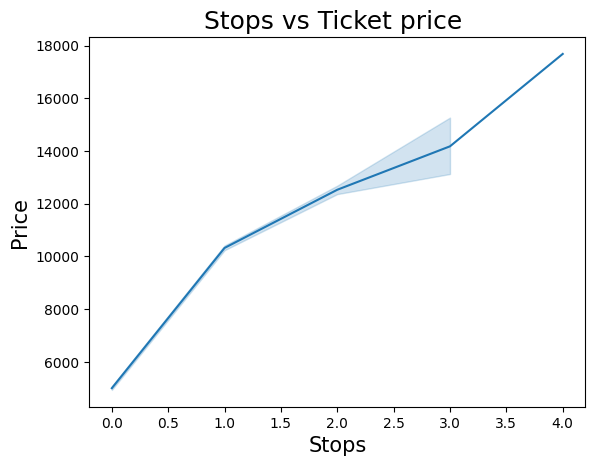

<Figure size 1500x500 with 0 Axes>

In [462]:
x= df_train['Total_Stops']
y=df_train['Price']
sns.lineplot(x=x,y=y)
plt.xlabel('Stops',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.title('Stops vs Ticket price ',fontsize=18)
plt.figure(figsize=(15,5))
plt.show()

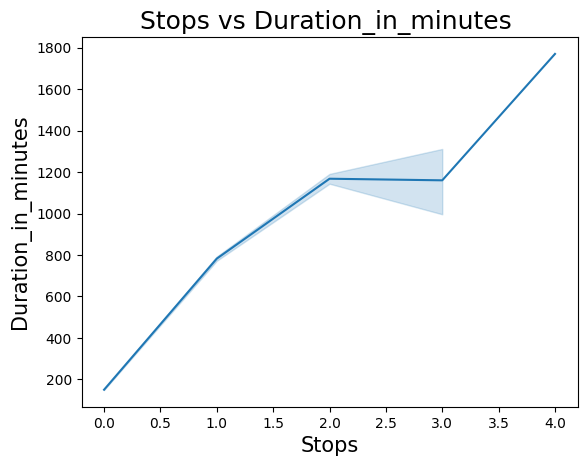

<Figure size 1500x500 with 0 Axes>

In [463]:
x= df_train['Total_Stops']
y=df_train['Duration_in_minutes']
sns.lineplot(x=x,y=y)
plt.xlabel('Stops',fontsize=15)
plt.ylabel('Duration_in_minutes',fontsize=15)
plt.title('Stops vs Duration_in_minutes ',fontsize=18)
plt.figure(figsize=(15,5))
plt.show()

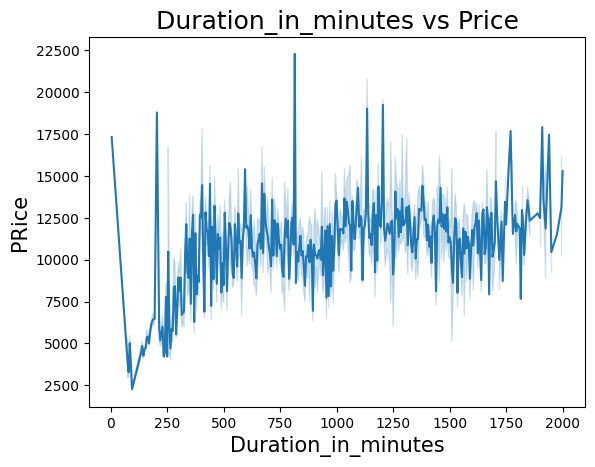

<Figure size 1500x500 with 0 Axes>

In [464]:
x= df_train['Duration_in_minutes']
y=df_train['Price']
sns.lineplot(x=x,y=y)
plt.xlabel('Duration_in_minutes',fontsize=15)
plt.ylabel('PRice',fontsize=15)
plt.title('Duration_in_minutes vs Price',fontsize=18)
plt.figure(figsize=(15,5))
plt.show()

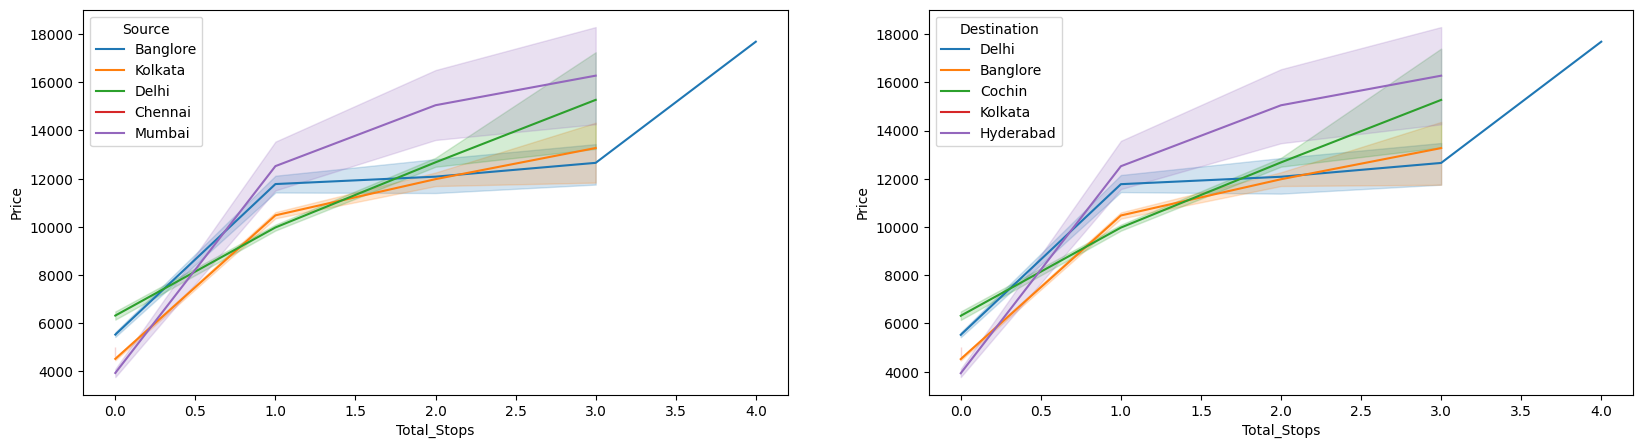

In [465]:
fig,ax=plt.subplots(1,2,figsize=(20,5))
sns.lineplot(x='Total_Stops',y='Price',data=df_train,hue='Source',ax=ax[0])
sns.lineplot(x='Total_Stops',y='Price',data=df_train,hue='Destination',ax=ax[1])
plt.show()

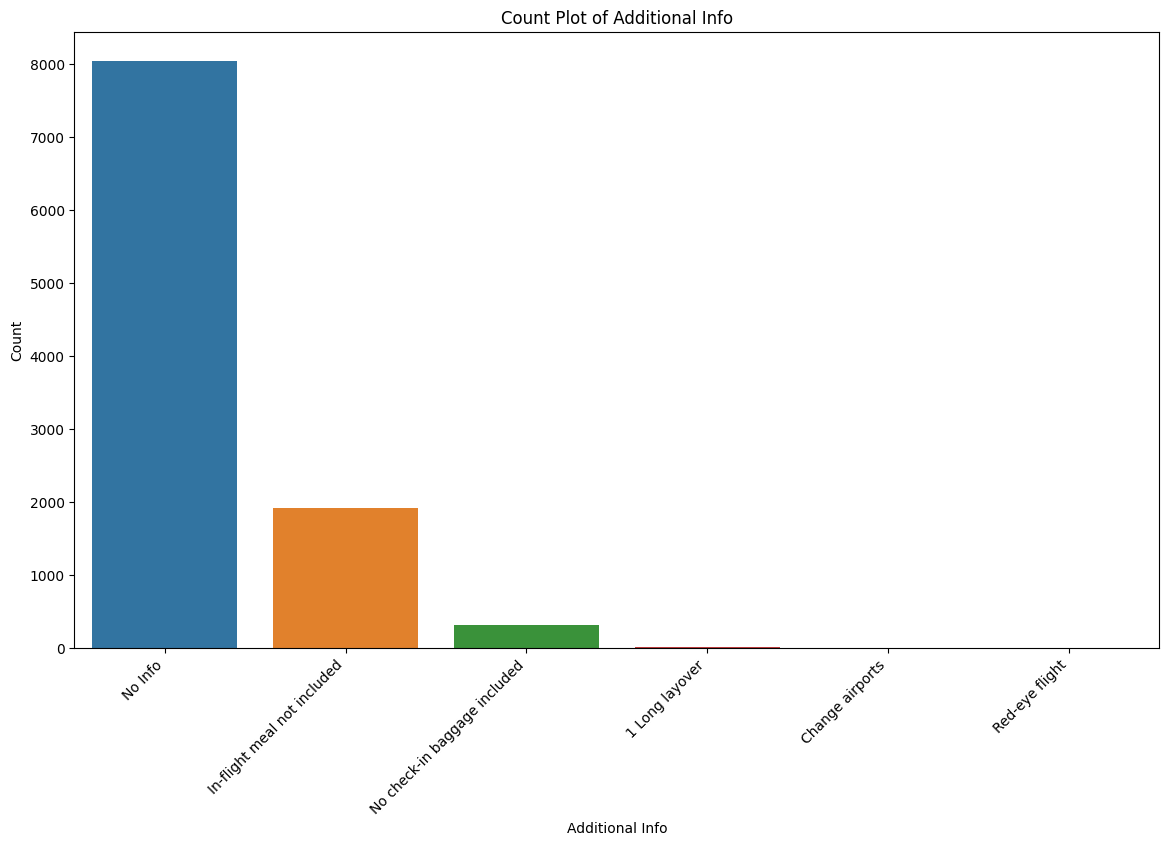

In [466]:
# Create a count plot for 'Additional_Info'
plt.figure(figsize=(14, 8))
sns.countplot(x='Additional_Info', data=df_train, order=df_train['Additional_Info'].value_counts().index)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Additional Info')
plt.ylabel('Count')
plt.title('Count Plot of Additional Info')
plt.show()

<Axes: xlabel='Source', ylabel='Price'>

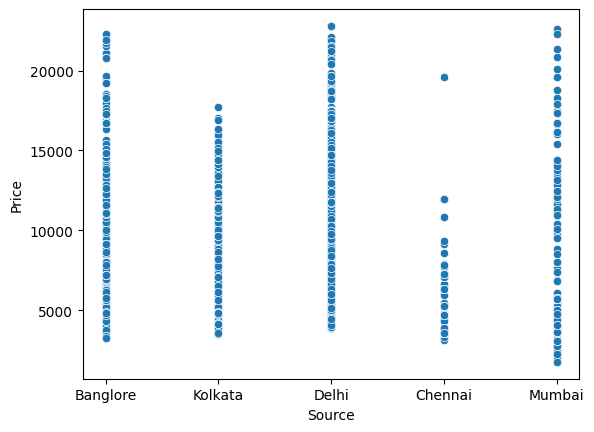

In [467]:
sns.scatterplot(x=df_train['Source'],y=df_train['Price'])

<Axes: xlabel='Destination', ylabel='Price'>

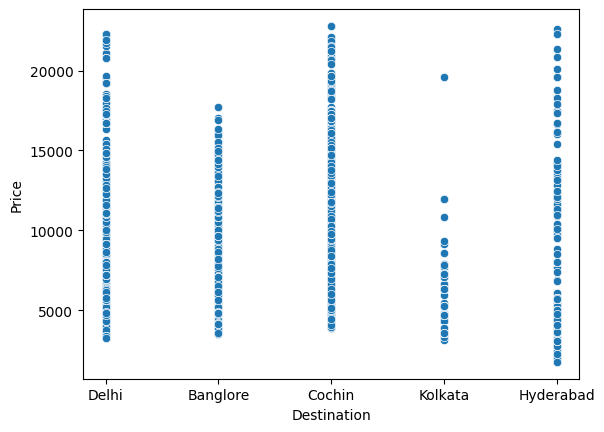

In [468]:
sns.scatterplot(x=df_train['Destination'],y=df_train['Price'])

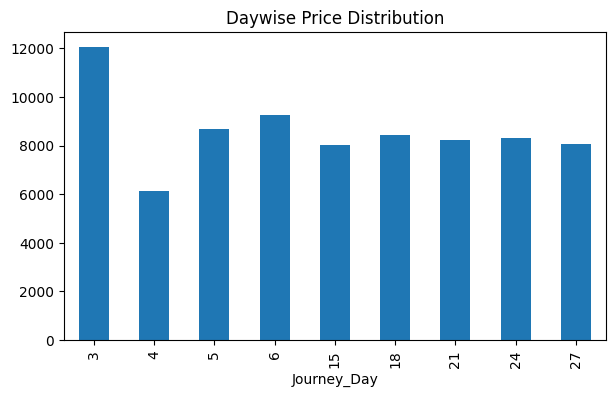

In [469]:
plt.figure(figsize=(7,4))

df_train.groupby(['Journey_Day'])['Price'].mean().plot(kind='bar')
plt.title('Daywise Price Distribution')

plt.show()

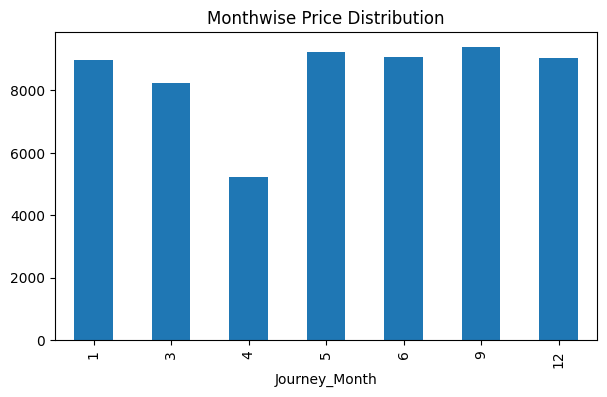

In [470]:
#Here we see that we dont have data available of Feb, july, Aug, Oct and Nov.
plt.figure(figsize=(7,4))

df_train.groupby(['Journey_Month'])['Price'].mean().plot(kind='bar')
plt.title('Monthwise Price Distribution')

plt.show()

In [471]:
df_train.corr()

,Total_Stops,Price,Duration_in_minutes,Journey_Day,Journey_Month
Total_Stops,1.000000,0.667000,0.720943,-0.029562,0.072825
Price,0.667000,1.000000,0.571815,-0.147474,0.069945
Duration_in_minutes,0.720943,0.571815,1.000000,-0.043667,0.068001
Journey_Day,-0.029562,-0.147474,-0.043667,1.000000,-0.279628
Journey_Month,0.072825,0.069945,0.068001,-0.279628,1.000000


<Axes: >

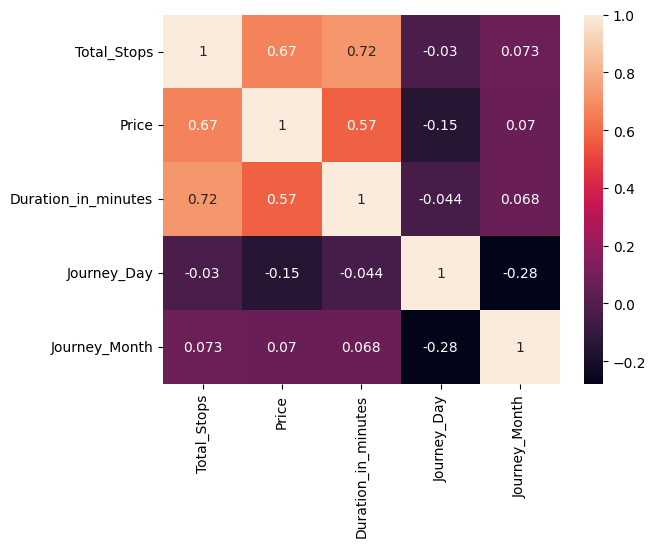

In [472]:
sns.heatmap(df_train.corr(),annot=True)

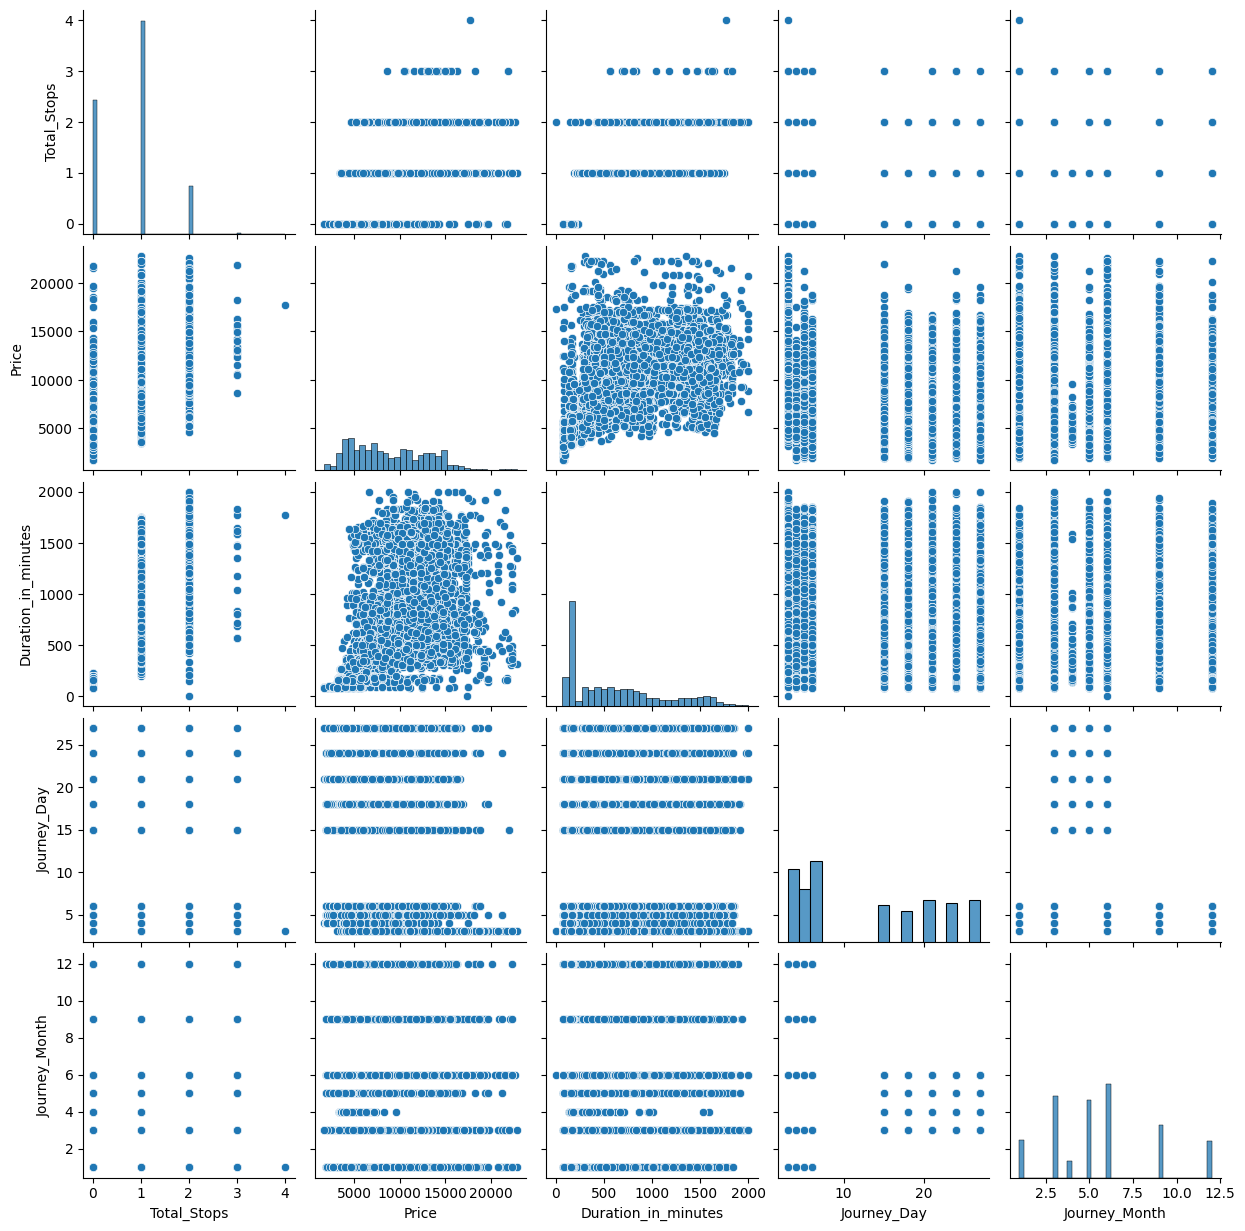

In [473]:
sns.pairplot(data=df_train)

In [474]:
df_train.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Dep_Time', 'Arrival_Time',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price',
       'Duration_in_minutes', 'Date', 'Journey_Day', 'Journey_Month'],
      dtype='object')

In [475]:
df_train.dtypes

Airline                        object
Source                         object
Destination                    object
Route                          object
Dep_Time                       object
Arrival_Time                   object
Duration                       object
Total_Stops                     int64
Additional_Info                object
Price                           int64
Duration_in_minutes             int64
Date                   datetime64[ns]
Journey_Day                     int64
Journey_Month                   int64
dtype: object

##Label Encoding

In [476]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_train['Airline'] =le.fit_transform(df_train['Airline'])
df_train['Source'] =le.fit_transform(df_train['Source'])
df_train['Destination'] =le.fit_transform(df_train['Destination'])
df_train['Route'] =le.fit_transform(df_train['Route'])
df_train['Dep_Time'] =le.fit_transform(df_train['Dep_Time'])
df_train['Arrival_Time'] =le.fit_transform(df_train['Arrival_Time'])
df_train['Additional_Info'] =le.fit_transform(df_train['Additional_Info'])

In [477]:
df_train.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Duration_in_minutes,Date,Journey_Day,Journey_Month
0,3,0,2,18,4,2,2h 50m,0,3,3897,170,2019-03-24,24,3
1,1,3,0,80,3,0,7h 25m,2,3,7662,445,2019-01-05,5,1
2,4,2,1,114,3,2,19h,2,3,13882,1140,2019-09-06,6,9
3,3,3,0,87,1,4,5h 25m,1,3,6218,325,2019-12-05,5,12
4,3,0,2,29,0,4,4h 45m,1,3,13302,285,2019-01-03,3,1


In [478]:
#Drop the irrelevent columns
df_train = df_train.drop(columns=["Date","Duration"], axis=1)

In [479]:
df_train.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Price,Duration_in_minutes,Journey_Day,Journey_Month
0,3,0,2,18,4,2,0,3,3897,170,24,3
1,1,3,0,80,3,0,2,3,7662,445,5,1
2,4,2,1,114,3,2,2,3,13882,1140,6,9
3,3,3,0,87,1,4,1,3,6218,325,5,12
4,3,0,2,29,0,4,1,3,13302,285,3,1


##Feature Selection

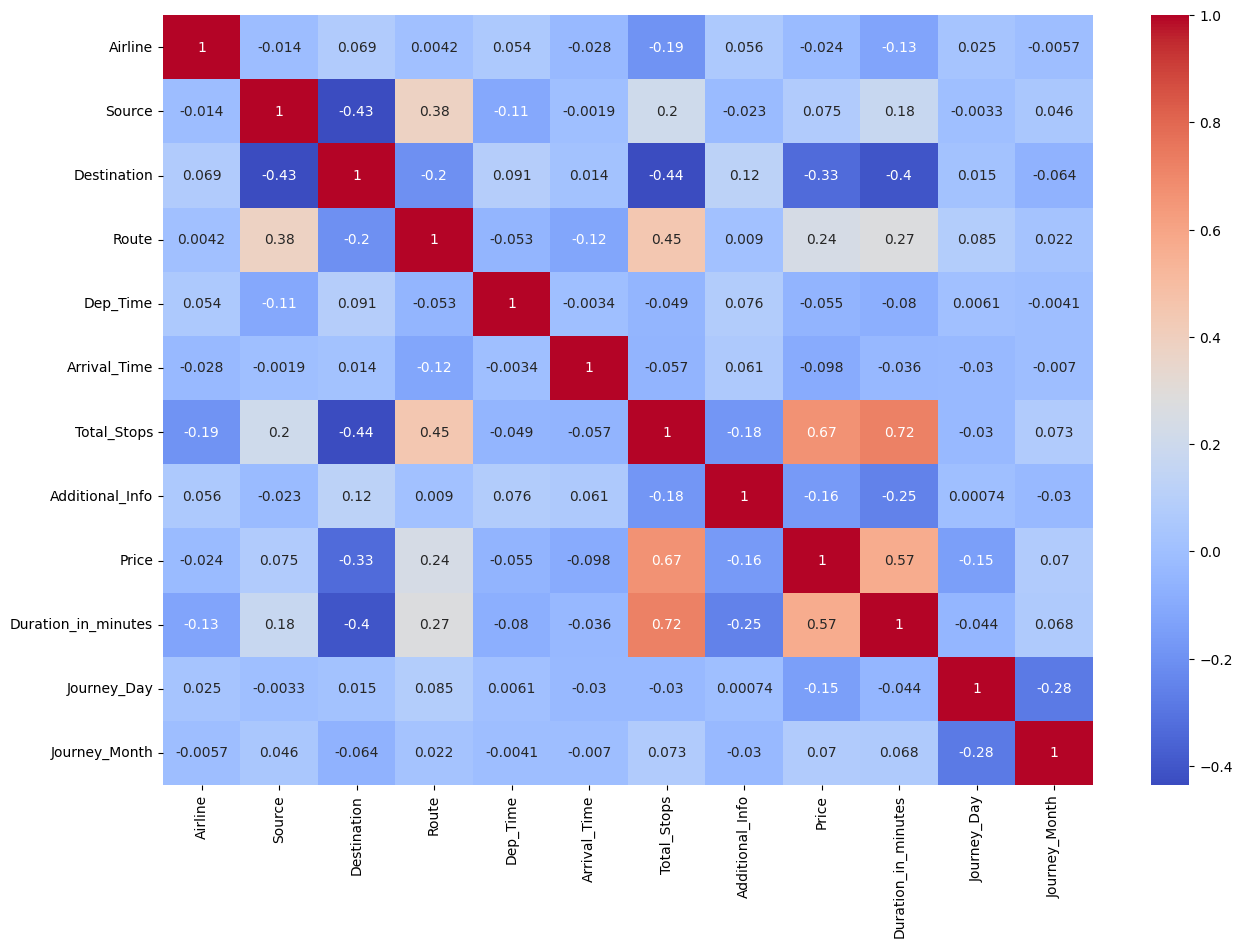

In [480]:
#heatmap:
plt.figure(figsize=(15,10))
sns.heatmap(df_train.corr(),cmap='coolwarm',annot=True)
plt.show()

In [481]:
features = ['Airline','Source','Destination','Route','Dep_Time','Arrival_Time','Journey_Day','Journey_Month','Total_Stops','Additional_Info','Duration_in_minutes']
target = ['Price']

x = df_train[features]
y = df_train[target]

##Spltting the dataset into Training set and Testings set

In [482]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20,random_state=0)

##Standardizing the dataset

In [483]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [484]:
#standardization
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

##1. Linear Regression Model to predict the price of the flights

In [485]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [486]:
y_pred=lr.predict(x_test)

In [487]:
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.metrics import mean_absolute_percentage_error

In [488]:
print('r2_score is : ',r2_score(y_test,y_pred))
print('Mean squared error is : ', metrics.mean_squared_error(y_test,y_pred))
print('Root mean squared error is :', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

r2_score is :  0.46540809978551734
Mean squared error is :  8635341.391518425
Root mean squared error is : 2938.5951390959635


##2. DecisionTree Regressor Model to predict the price of the flights

In [489]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [490]:
y_pred=dt.predict(x_test)

In [491]:
print('r2_score is : ',r2_score(y_test,y_pred))
print('Mean squared error is : ', metrics.mean_squared_error(y_test,y_pred))
print('Root mean squared error is :', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

r2_score is :  0.6093168746188729
Mean squared error is :  6310761.839485187
Root mean squared error is : 2512.122974594434


##3. RandomForest Regressor Model to predict the price of the flights

In [492]:
from sklearn.ensemble import RandomForestRegressor
rfc = RandomForestRegressor(n_estimators=40, random_state=42)
rfc.fit(x_train,y_train)

RandomForestRegressor(n_estimators=40, random_state=42)

In [493]:
y_pred=rfc.predict(x_test)

In [494]:
print('r2_score is : ',r2_score(y_test,y_pred))
print('Mean squared error is : ', metrics.mean_squared_error(y_test,y_pred))
print('Root mean squared error is :', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

r2_score is :  0.821513168011806
Mean squared error is :  2883123.9820324
Root mean squared error is : 1697.9764374196716


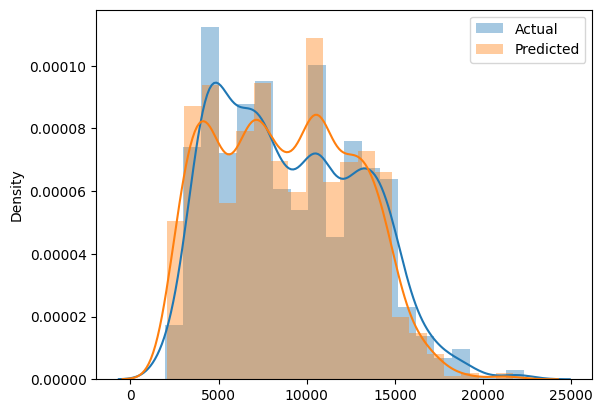

In [495]:
sns.distplot(y_test,label='Actual')
sns.distplot(y_pred,label='Predicted')
plt.legend()
plt.show()

##4. XGBoost Regressor Model to predict the price of the flights

In [496]:
from xgboost import XGBRFRegressor
xgb = XGBRFRegressor()
xgb.fit(x_train, y_train)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, reg_alpha=None, ...)

In [497]:
y_pred = xgb.predict(x_test)

In [498]:
print('r2_score is : ',r2_score(y_test,y_pred))
print('Mean squared error is : ', metrics.mean_squared_error(y_test,y_pred))
print('Root mean squared error is :', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

r2_score is :  0.619653143482769
Mean squared error is :  6143798.572143397
Root mean squared error is : 2478.6687096389865


##Using K-Fold Cross Validation to measure accuracy of our best model RandomForest Regressor

In [499]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_scores = cross_val_score(RandomForestRegressor(n_estimators=40, random_state=42), x, y, cv=cv)
cross_val_scores

array([0.91074797, 0.90661793, 0.92261544, 0.92968533, 0.90947841])

**We can see that in 5 iterations we get a score 92%. This is pretty good.**

##Predicting the Price of Test set.

In [500]:
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [501]:
df_test.shape

(2671, 10)

In [502]:
df_test.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [503]:
df_test.duplicated().sum()

26

In [504]:
df_test = df_test.drop_duplicates()

In [505]:
#Contain two values of Delhi so replace New Delhi to Delhi.
df_test['Destination'] = df_test['Destination'].replace({'New Delhi':'Delhi'})

In [506]:
# Function to extract only the time part from Arrival_Time
def extract_time(arrival_time):
    return arrival_time.split()[0]

# Apply the function to the 'Arrival_Time' column
df_test['Arrival_Time'] = df_test['Arrival_Time'].apply(extract_time)

In [507]:
# Function to convert duration to numeric value
def convert_duration(duration):
    total_minutes = 0
    parts = duration.split()
    for part in parts:
        if 'h' in part:
            total_minutes += int(part[:-1]) * 60  # Extract the numeric part before 'h' and convert to minutes
        elif 'm' in part:
            total_minutes += int(part[:-1])  # Extract the numeric part before 'm'
    return total_minutes

# Convert 'Duration' column to a new column 'Duration_in_minutes'
df_test['Duration_in_minutes'] = df_test['Duration'].apply(convert_duration)

In [508]:
# Function to categorize time into Morning, Afternoon, Evening, Night, and Late Night
def categorize_time(time_str):
    hour = int(time_str.split(':')[0])
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    elif 21 <= hour <= 23:
        return 'Night'
    else:
        return 'Late Night'

# Apply the function to create new columns
df_test['Dep_Time'] = df_test['Dep_Time'].apply(categorize_time)
df_test['Arrival_Time'] = df_test['Arrival_Time'].apply(categorize_time)

In [509]:
##Outliers removal of duration time
Q1 = df_test.Duration_in_minutes.quantile(0.25)
Q3 = df_test.Duration_in_minutes.quantile(0.75)
Q1, Q3

(175.0, 910.0)

In [510]:
IQR = Q3 - Q1
IQR

735.0

In [511]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(-927.5, 2012.5)

In [512]:
df_test[(df_test.Duration_in_minutes<lower_limit)|(df_test.Duration_in_minutes>upper_limit)].shape

(23, 11)

In [513]:
# Remove rows with 'Duratiin_in_minutes' outside the specified range
outliers = (df_test['Duration_in_minutes'] < lower_limit) | (df_test['Duration_in_minutes'] > upper_limit)
df_test = df_test[~outliers]

In [514]:
df_test['Date'] = pd.to_datetime(df_test['Date_of_Journey'])
df_test['Journey_Day'] = df_test['Date'].dt.day
df_test['Journey_Month'] = df_test['Date'].dt.month
df_test.drop('Date_of_Journey',axis=1,inplace=True)

In [515]:
##Label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_test['Airline'] =le.fit_transform(df_test['Airline'])
df_test['Source'] =le.fit_transform(df_test['Source'])
df_test['Destination'] =le.fit_transform(df_test['Destination'])
df_test['Route'] =le.fit_transform(df_test['Route'])
df_test['Dep_Time'] =le.fit_transform(df_test['Dep_Time'])
df_test['Arrival_Time'] =le.fit_transform(df_test['Arrival_Time'])
df_test['Total_Stops'] =le.fit_transform(df_test['Total_Stops'])
df_test['Additional_Info'] =le.fit_transform(df_test['Additional_Info'])

In [516]:
#Drop the irrelevent columns
df_test = df_test.drop(columns=["Date","Duration"], axis=1)

In [517]:
# Predict the price in the test set
df_test['Price'] = rfc.predict(df_test[features])

In [518]:
pd.DataFrame(df_test).to_csv('submission.csv')

**The RandomForest Regressor gives the best accuracy for predict the price of flights. so here with submission file containing the prediction of the Price of flights for Test set.**